# **CC7182 Programming for Analytics - Coursework**

# **1. Data Understanding**

# Load Data

In [ ]:
import pandas as pd

# Step 1: Load and view the dataset
data = pd.read_csv("Marketing Campaign data.csv")

print(data.head())

   CUST_ID CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
0   101501           F   41              NeverM  United States of America   
1   101502           M   27              NeverM  United States of America   
2   101503           F   20              NeverM  United States of America   
3   101504           M   45             Married  United States of America   
4   101505           M   34              NeverM  United States of America   

      CUST_INCOME_LEVEL EDUCATION OCCUPATION HOUSEHOLD_SIZE  YRS_RESIDENCE  \
0  J: 190,000 - 249,999   Masters      Prof.              2              4   
1  I: 170,000 - 189,999     Bach.      Sales              2              3   
2  H: 150,000 - 169,999   HS-grad    Cleric.              2              2   
3    B: 30,000 - 49,999     Bach.      Exec.              3              5   
4  K: 250,000 - 299,999   Masters      Sales             9+              5   

   AFFINITY_CARD  BULK_PACK_DISKETTES  FLAT_PANEL_MONITOR  \
0      

# 1.1: Metadata Table, Histogram, Mode & Bar Chart


In [ ]:
# 1. Metadata Table

#Step 1: Define the list of attributes
attributes = data.columns.tolist()

# Step 2: Create an empty list to store metadata dictionaries
metadata_list = []

# Step 3: Populate metadata list for all attributes
for attribute in attributes:
    if data[attribute].dtype in ['int64', 'float64']:
        description = data[attribute].describe()
        metadata_list.append({'Attribute Name': attribute,
                              'Description': 'Description of ' + attribute,
                              'Type': 'Numeric',
                              'Maximum': description['max'],
                              'Minimum': description['min'],
                              'Mean': description['mean'],
                              'Std. Deviation': description['std']})
    else:
        metadata_list.append({'Attribute Name': attribute,
                              'Description': 'Description of ' + attribute,
                              'Type': 'Non-Numeric'})

# Step 4: Create DataFrame from metadata list
metadata = pd.DataFrame(metadata_list)

# Step 5: Save metadata table to CSV file
metadata.to_csv('metadata.csv', index=False)

# Step 6: Display the metadata table
metadata

,Attribute Name,Description,Type,Maximum,Minimum,Mean,Std. Deviation
0,CUST_ID,Description of CUST_ID,Numeric,103000.0,101501.0,102250.500000,433.157015
1,CUST_GENDER,Description of CUST_GENDER,Non-Numeric,NaN,NaN,NaN,NaN
2,AGE,Description of AGE,Numeric,90.0,17.0,38.892000,13.636384
3,CUST_MARITAL_STATUS,Description of CUST_MARITAL_STATUS,Non-Numeric,NaN,NaN,NaN,NaN
4,COUNTRY_NAME,Description of COUNTRY_NAME,Non-Numeric,NaN,NaN,NaN,NaN
5,CUST_INCOME_LEVEL,Description of CUST_INCOME_LEVEL,Non-Numeric,NaN,NaN,NaN,NaN
6,EDUCATION,Description of EDUCATION,Non-Numeric,NaN,NaN,NaN,NaN
7,OCCUPATION,Description of OCCUPATION,Non-Numeric,NaN,NaN,NaN,NaN
8,HOUSEHOLD_SIZE,Description of HOUSEHOLD_SIZE,Non-Numeric,NaN,NaN,NaN,NaN
9,YRS_RESIDENCE,Description of YRS_RESIDENCE,Numeric,14.0,0.0,4.088667,1.920919


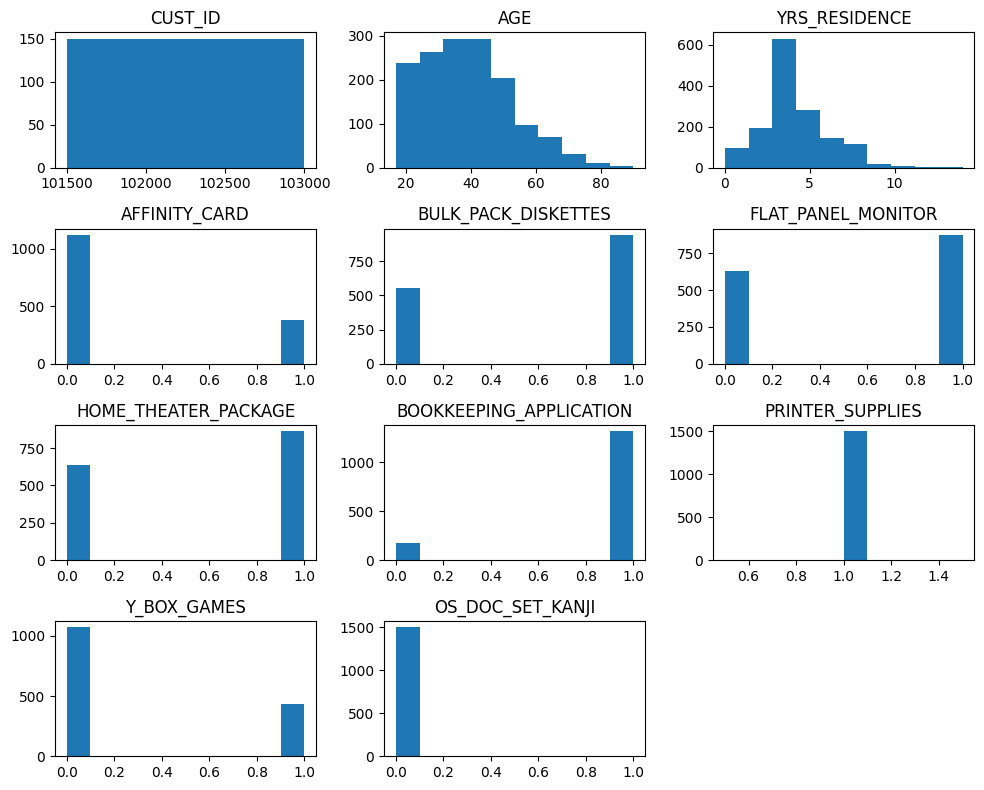

In [ ]:
# 2. Histogram for Numeric Data

import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(figsize=(10, 8), grid=False)
plt.tight_layout()
plt.savefig('numeric_data_histogram.png')  # Save histogram as an image
plt.show()

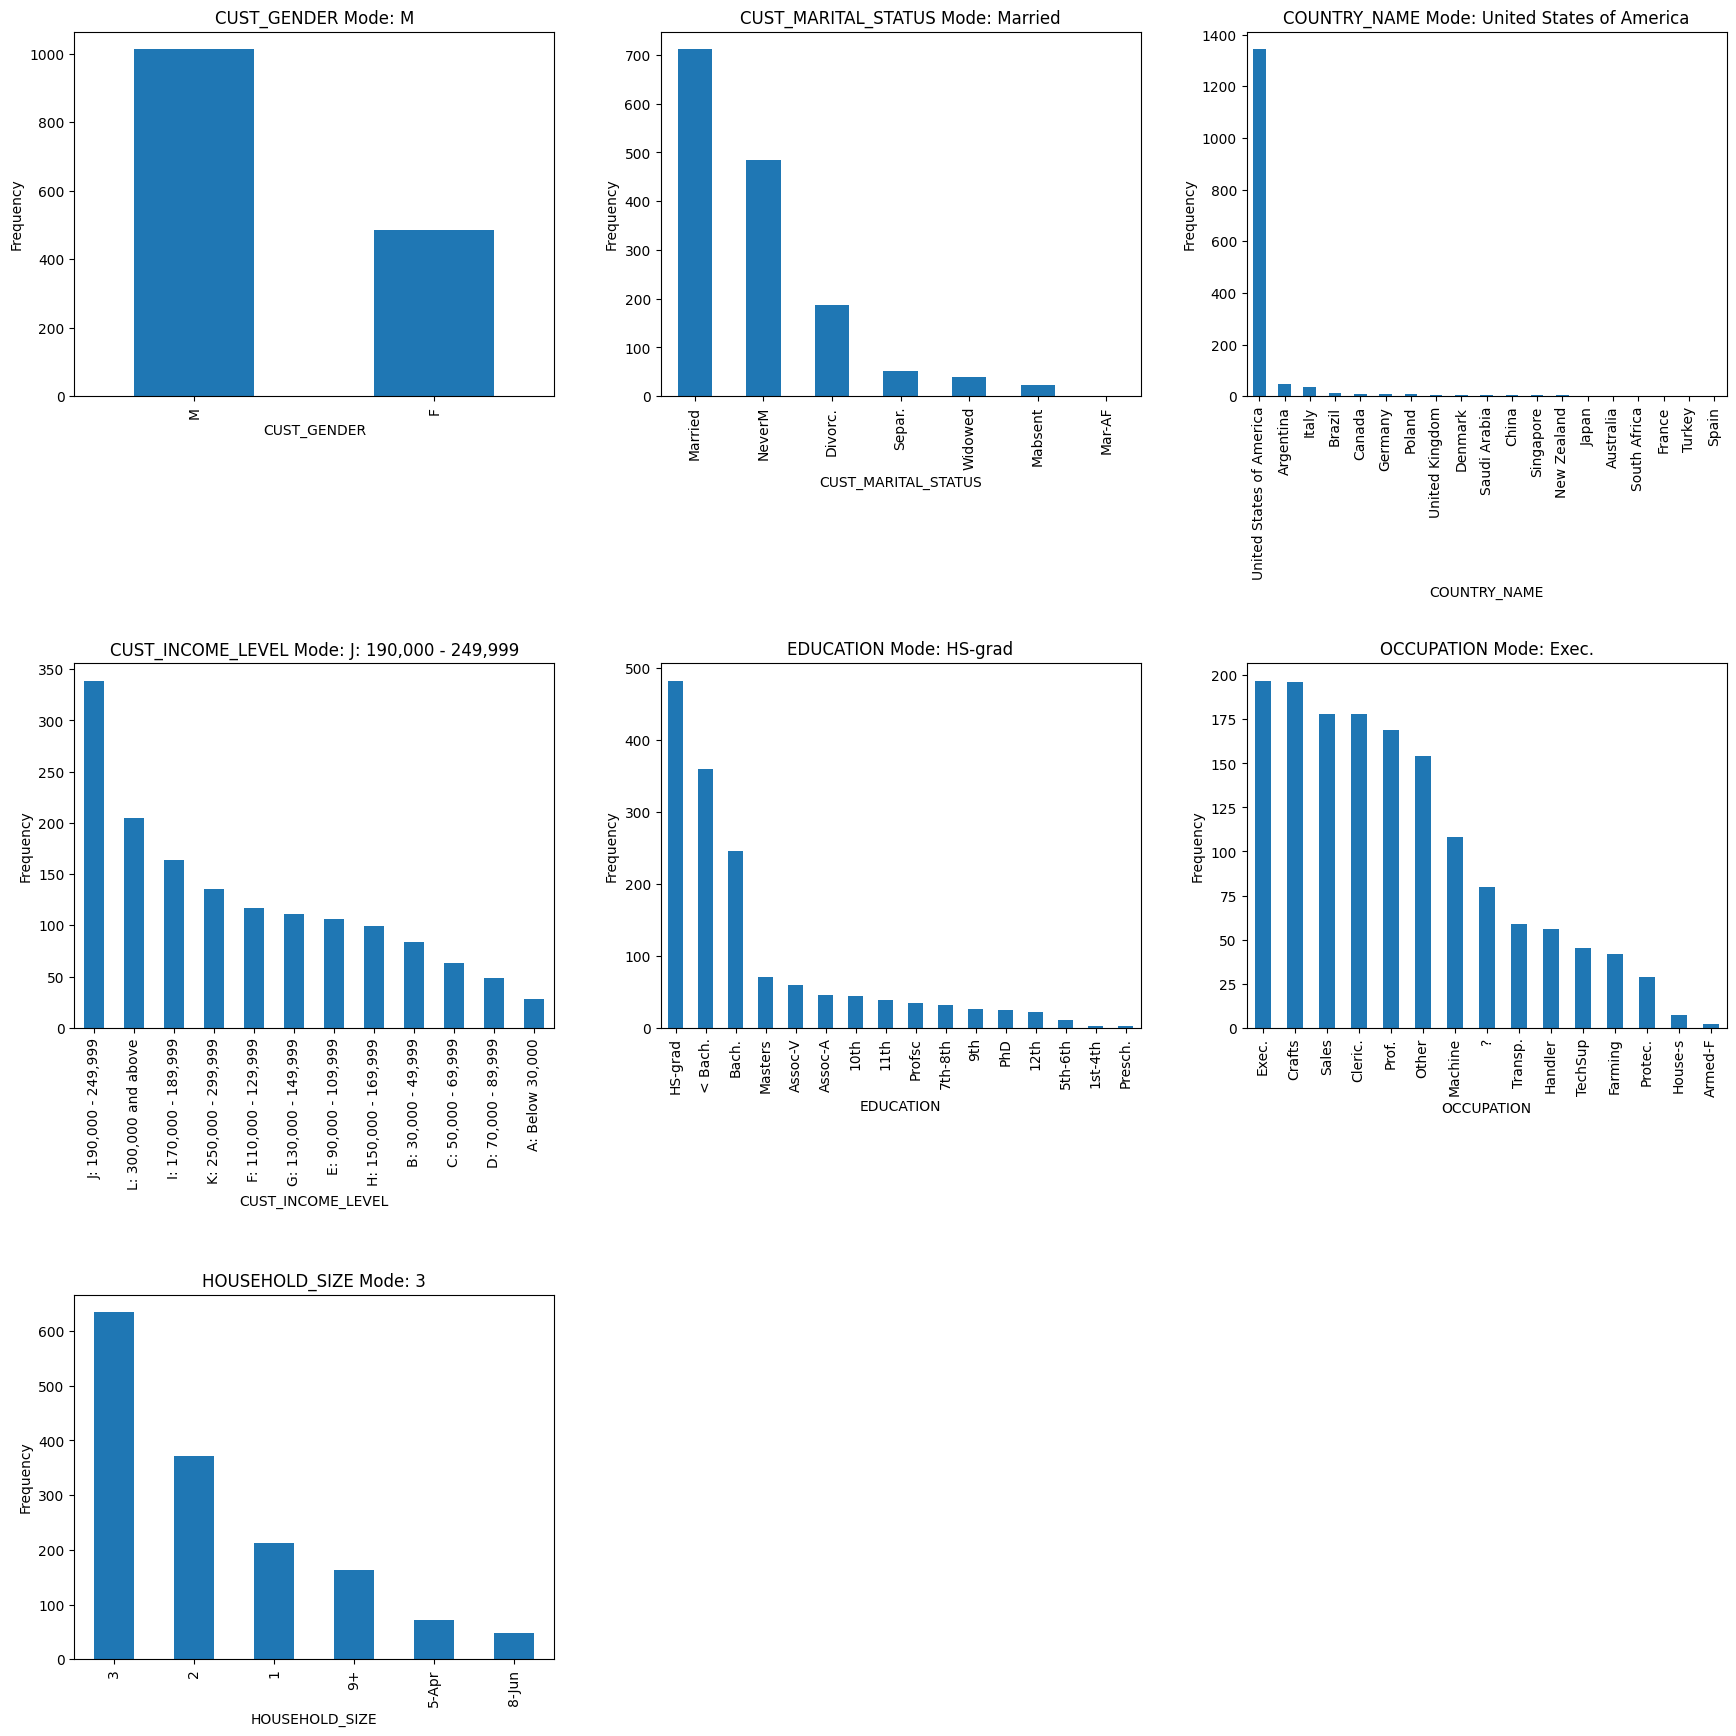

In [ ]:
#3. Mode & Bar Charts for Nominal Data

import matplotlib.pyplot as plt

# Check if 'COMMENTS' attribute exists before dropping it (dropping this attribute as it doesn't look good to me)
if 'COMMENTS' in data.columns:
    data = data.drop(columns=['COMMENTS'])

# Step 1: Define Nominal Data
nominal_data = data.select_dtypes(include=['object'])

# Step 2: Calculate mode for each attribute
mode_values = nominal_data.mode().iloc[0]

# Step 3: Plot bar charts
num_nominal_attributes = len(nominal_data.columns)
num_plots_per_row = 3  # Change the number of plots per row to 3
num_rows = (num_nominal_attributes + num_plots_per_row - 1) // num_plots_per_row

plt.figure(figsize=(18, 6 * num_rows))  # Adjust the figure size for 3 charts per row

for i, column in enumerate(nominal_data.columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    nominal_data[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Mode: {mode_values[column]}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.grid(False)  # Remove the grid
plt.tight_layout(pad=3.0)
plt.savefig('nominal_data_bar_chart.png')  # Save bar chart as an image
plt.show()

# 1.2: Missing (Null, Blank, Unknown) & Error Data (Invalid or Mismatching Data)

In [ ]:
data.dtypes

CUST_ID                     int64
CUST_GENDER                object
AGE                         int64
CUST_MARITAL_STATUS        object
COUNTRY_NAME               object
CUST_INCOME_LEVEL          object
EDUCATION                  object
OCCUPATION                 object
HOUSEHOLD_SIZE             object
YRS_RESIDENCE               int64
AFFINITY_CARD               int64
BULK_PACK_DISKETTES         int64
FLAT_PANEL_MONITOR          int64
HOME_THEATER_PACKAGE        int64
BOOKKEEPING_APPLICATION     int64
PRINTER_SUPPLIES            int64
Y_BOX_GAMES                 int64
OS_DOC_SET_KANJI            int64
dtype: object

In [ ]:
# 1. Missing Data (Null, Blank, Unknown)
# 2. Error Data (Invalid or Mismatching Data)

# Step 1: Load Data
data = pd.read_csv("Marketing Campaign data.csv")

# Step 2: Define the list of attributes
attributes = data.columns

# Step 3: Create DataFrame with missing and error data information
missing_error_df = pd.DataFrame([
    {
        'Attribute': attribute,
        'Missing Data': data[attribute].isnull().sum() + (data[attribute] == '').sum() + (data[attribute] == 'unknown').sum(),
        'Error Data': len(data[data[attribute].str.contains(r'[?]', na=False)]) + len(data[data[attribute].str.contains(r'\b[0-9]{1,2}-\b', na=False)]) + len(data[data[attribute].str.contains(r'\b[0-9]{1,2}-[a-zA-Z]{3}\b', na=False)]) if data[attribute].dtype == 'object' else len(data[~data[attribute].astype(str).str.isnumeric()]) if data[attribute].dtype in ['int64', 'float64'] else 0
    }
    for attribute in attributes
])

# Step 4: Display the DataFrame
print(missing_error_df)

                  Attribute  Missing Data  Error Data
0                   CUST_ID             0           0
1               CUST_GENDER             0           0
2                       AGE             0           0
3       CUST_MARITAL_STATUS             0           0
4              COUNTRY_NAME             0           0
5         CUST_INCOME_LEVEL             0           0
6                 EDUCATION             0           0
7                OCCUPATION             0          80
8            HOUSEHOLD_SIZE             0         119
9             YRS_RESIDENCE             0           0
10            AFFINITY_CARD             0           0
11      BULK_PACK_DISKETTES             0           0
12       FLAT_PANEL_MONITOR             0           0
13     HOME_THEATER_PACKAGE             0           0
14  BOOKKEEPING_APPLICATION             0           0
15         PRINTER_SUPPLIES             0           0
16              Y_BOX_GAMES             0           0
17         OS_DOC_SET_KANJI 

# **2.	Data Preparation**

# 2.1: Reduce variables with ZERO influences on the AFFINITY_CARD & Drop COMMENT


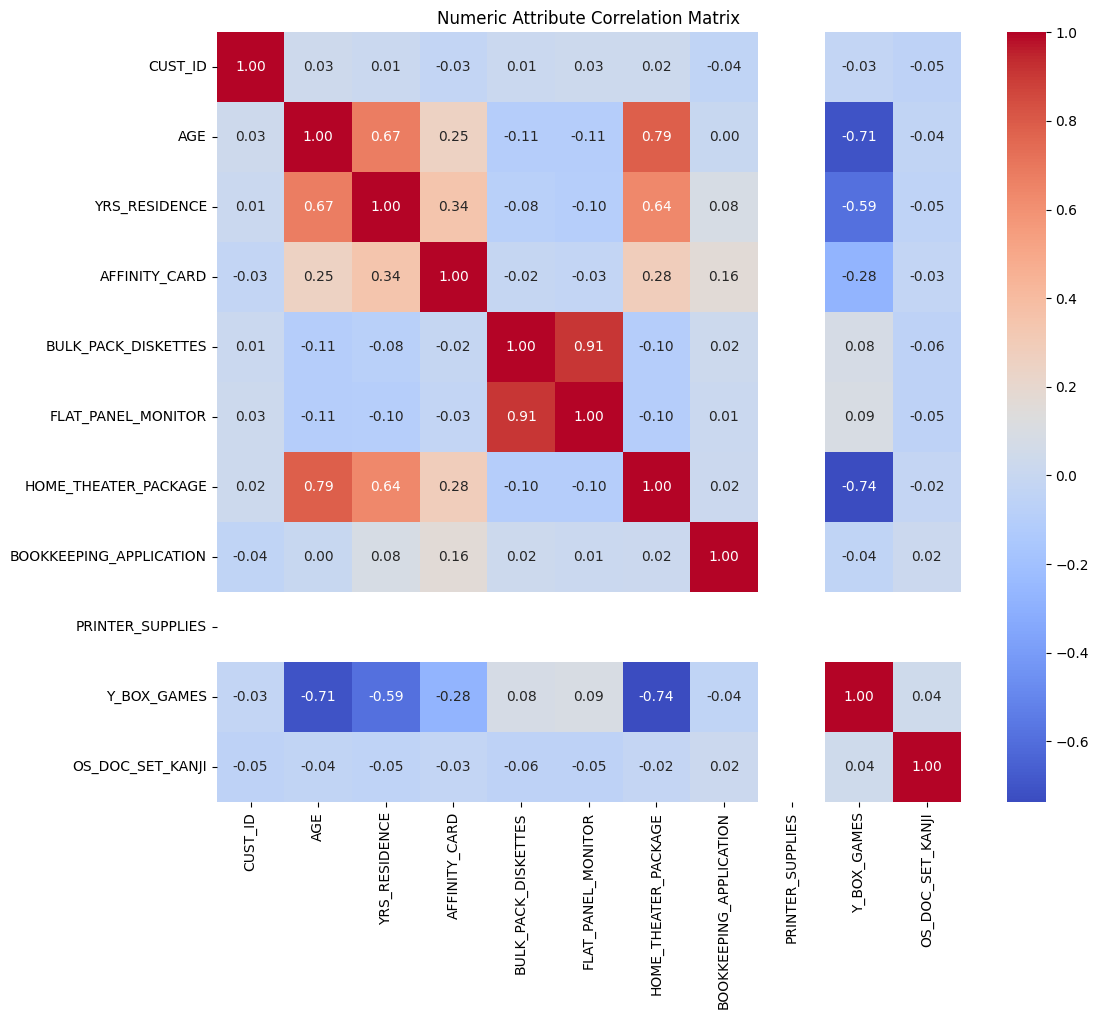

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Marketing Campaign data.csv")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numeric Attribute Correlation Matrix")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv("Marketing Campaign data.csv")

# Define the target variable
target_variable = 'AFFINITY_CARD'

# Separate numerical and categorical columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

# Calculate correlation coefficients between numerical variables and the target variable
correlation_with_target_numeric = data[numeric_cols].corr()[target_variable]

# Calculate chi-square scores between categorical variables and the target variable
chi2_scores = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data[target_variable])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_scores[col] = chi2

# Create DataFrames for correlation coefficients and chi-square scores
correlation_table = pd.DataFrame({'Correlation with Target': correlation_with_target_numeric})
chi2_table = pd.DataFrame({'Chi2 Score': chi2_scores})

# Display the tables
print("Correlation coefficients with the target variable (numeric variables):")
print(correlation_table)

print("\nChi-square scores with the target variable (categorical variables):")
print(chi2_table)

Correlation coefficients with the target variable (numeric variables):
                         Correlation with Target
CUST_ID                                -0.025969
AGE                                     0.246711
YRS_RESIDENCE                           0.342691
AFFINITY_CARD                           1.000000
BULK_PACK_DISKETTES                    -0.017887
FLAT_PANEL_MONITOR                     -0.028467
HOME_THEATER_PACKAGE                    0.283358
BOOKKEEPING_APPLICATION                 0.162404
PRINTER_SUPPLIES                             NaN
Y_BOX_GAMES                            -0.281121
OS_DOC_SET_KANJI                       -0.026075

Chi-square scores with the target variable (categorical variables):
                     Chi2 Score
COMMENTS             764.227898
COUNTRY_NAME          33.355885
CUST_GENDER           75.770362
CUST_INCOME_LEVEL     14.766735
CUST_MARITAL_STATUS  318.400737
EDUCATION            236.897382
HOUSEHOLD_SIZE       324.358426
OCCUPATION      

In [ ]:
# Drop attributes with zero influence on the target variable
attributes_to_drop = ['CUST_ID', 'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'COMMENTS']
transformed_data = data.drop(columns=attributes_to_drop)

# Save transformed data to DataFrame
transformed_data.to_csv("transformed_data.csv", index=False)

In [ ]:
transformed_data

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,M,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1
1496,M,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1
1497,M,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1
1498,M,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1


# 2.2: Clean data (e.g remove records with missing values or errors if it’s less than 5%)

In [ ]:
# 1. Missing Data (Null, Blank, Unknown)
# 2. Error Data (Invalid or Mismatching Data)

# Step 1: Load Data
data = pd.read_csv("transformed_data.csv")

# Step 2: Define the list of attributes
attributes = data.columns

# Step 3: Create DataFrame with missing and error data information
missing_error_df = pd.DataFrame([
    {
        'Attribute': attribute,
        'Missing Data': data[attribute].isnull().sum() + (data[attribute] == '').sum() + (data[attribute] == 'unknown').sum(),
        'Error Data': len(data[data[attribute].str.contains(r'[?]', na=False)]) + len(data[data[attribute].str.contains(r'\b[0-9]{1,2}-\b', na=False)]) + len(data[data[attribute].str.contains(r'\b[0-9]{1,2}-[a-zA-Z]{3}\b', na=False)]) if data[attribute].dtype == 'object' else len(data[~data[attribute].astype(str).str.isnumeric()]) if data[attribute].dtype in ['int64', 'float64'] else 0
    }
    for attribute in attributes
])

# Step 4: Display the DataFrame
print(missing_error_df)

                  Attribute  Missing Data  Error Data
0               CUST_GENDER             0           0
1                       AGE             0           0
2       CUST_MARITAL_STATUS             0           0
3              COUNTRY_NAME             0           0
4         CUST_INCOME_LEVEL             0           0
5                 EDUCATION             0           0
6                OCCUPATION             0          80
7            HOUSEHOLD_SIZE             0         119
8             YRS_RESIDENCE             0           0
9             AFFINITY_CARD             0           0
10     HOME_THEATER_PACKAGE             0           0
11  BOOKKEEPING_APPLICATION             0           0
12         PRINTER_SUPPLIES             0           0


In [ ]:
# Remove Records with missing or Error Data (e.g., 5%)

# Step 1: Define the threshold percentage
threshold_percentage = 5

# Step 2: Calculate the threshold count based on the threshold percentage
threshold_count = len(data) * (threshold_percentage / 100)

# Step 3: Create a copy of the original data for transformation
cleaned_data = data.copy()

# Step 4: Iterate over attributes to check missing and error data
for attribute in attributes:
    # Step 4.1: Calculate the count of missing data
    missing_count = cleaned_data[attribute].isnull().sum() + \
                    (cleaned_data[attribute] == '').sum() + \
                    (cleaned_data[attribute] == 'unknown').sum()

    # Step 4.2: Calculate the count of error data
    error_count = len(cleaned_data[cleaned_data[attribute].str.contains(r'[?]', na=False)]) + \
                  len(cleaned_data[cleaned_data[attribute].str.contains(r'\b[0-9]{1,2}-\b', na=False)]) + \
                  len(cleaned_data[cleaned_data[attribute].str.contains(r'\b[0-9]{1,2}-[a-zA-Z]{3}\b', na=False)]) \
                  if cleaned_data[attribute].dtype == 'object' else \
                  len(cleaned_data[~cleaned_data[attribute].astype(str).str.isnumeric()]) \
                  if cleaned_data[attribute].dtype in ['int64', 'float64'] else 0

    # Step 4.3: Calculate the total count of missing or error data
    total_count = missing_count + error_count

    # Step 4.4: Check if the total count exceeds the threshold count
    if total_count > threshold_count:
        # Step 4.5: Remove records with missing or error data
        cleaned_data = cleaned_data[cleaned_data[attribute].notnull()]  # Remove records with missing data
        cleaned_data = cleaned_data[~cleaned_data[attribute].str.contains(r'[?]', na=False)]  # Remove records with error data

# Step 5: Save the cleaned data into a file named "cleaned_data.csv"
cleaned_data.to_csv("cleaned_data.csv", index=False)

# Step 6: Display a message to confirm the data has been saved
print("Cleaned data has been saved into 'cleaned_data.csv'")

cleaned_data

Cleaned data has been saved into 'cleaned_data.csv'


,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,M,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1
1496,M,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1
1497,M,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1
1498,M,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1420 non-null   object
 1   AGE                      1420 non-null   int64 
 2   CUST_MARITAL_STATUS      1420 non-null   object
 3   COUNTRY_NAME             1420 non-null   object
 4   CUST_INCOME_LEVEL        1420 non-null   object
 5   EDUCATION                1420 non-null   object
 6   OCCUPATION               1420 non-null   object
 7   HOUSEHOLD_SIZE           1420 non-null   object
 8   YRS_RESIDENCE            1420 non-null   int64 
 9   AFFINITY_CARD            1420 non-null   int64 
 10  HOME_THEATER_PACKAGE     1420 non-null   int64 
 11  BOOKKEEPING_APPLICATION  1420 non-null   int64 
 12  PRINTER_SUPPLIES         1420 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 155.3+ KB


# 2.3: Data Transformation using basic python & pandas’ library methods

# a)	CUST_GENDER into binary F - 0, M -1


In [ ]:
# Basic Python Method

# Step 1: Load the CSV file into a DataFrame
import pandas as pd

transformed_data_ML = pd.read_csv("cleaned_data.csv")

# Step 2: Create a dictionary to map genders to binary values
gender_map = {'F': 0, 'M': 1}

# Step 3: Replace 'CUST_GENDER' values with binary representation
for i in range(len(transformed_data_ML)):
    transformed_data_ML.at[i, 'CUST_GENDER'] = gender_map.get(transformed_data_ML.at[i, 'CUST_GENDER'])

# Step 4: Save the updated DataFrame to a new CSV file
transformed_data_ML.to_csv("transformed_data_ML.csv", index=False)

# Step 5: Display the entire updated dataset with the modified column
print(transformed_data_ML)

     CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
0              0   41              NeverM  United States of America   
1              1   27              NeverM  United States of America   
2              0   20              NeverM  United States of America   
3              1   45             Married  United States of America   
4              1   34              NeverM  United States of America   
...          ...  ...                 ...                       ...   
1415           1   17              NeverM  United States of America   
1416           1   41             Married                     Spain   
1417           1   53             Married  United States of America   
1418           1   55             Married  United States of America   
1419           0   40             Divorc.  United States of America   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION HOUSEHOLD_SIZE  YRS_RESIDENCE  \
0     J: 190,000 - 249,999   Masters      Prof.              2    

In [ ]:
# Using Pandas Library Method

# Step 1: Load the CSV file into a DataFrame
import pandas as pd

transformed_data_ML = pd.read_csv("cleaned_data.csv")

# Step 2: Create a dictionary to map genders to binary values
gender_map = {'F': 0, 'M': 1}

# Step 3: Replace the 'CUST_GENDER' column with binary values using map function
transformed_data_ML['CUST_GENDER'] = transformed_data_ML['CUST_GENDER'].map(gender_map)

# Step 4: Save the updated DataFrame to a new CSV file
transformed_data_ML.to_csv("transformed_data_ML.csv", index=False)

# Step 5: Display the entire updated dataset with the modified column
print(transformed_data_ML)

      CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
0               0   41              NeverM  United States of America   
1               1   27              NeverM  United States of America   
2               0   20              NeverM  United States of America   
3               1   45             Married  United States of America   
4               1   34              NeverM  United States of America   
...           ...  ...                 ...                       ...   
1415            1   17              NeverM  United States of America   
1416            1   41             Married                     Spain   
1417            1   53             Married  United States of America   
1418            1   55             Married  United States of America   
1419            0   40             Divorc.  United States of America   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION HOUSEHOLD_SIZE  YRS_RESIDENCE  \
0     J: 190,000 - 249,999   Masters      Prof.       

In [ ]:
transformed_data_ML

# b)	COUNTRY_NAME into ordinal number based on their occurrence in the data set in ascending order.

In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("cleaned_data.csv")

In [ ]:
# Check countries occurence
Countries = data['COUNTRY_NAME'].value_counts()
Countries

COUNTRY_NAME
United States of America    1277
Argentina                     44
Italy                         34
Brazil                        13
Germany                        8
Poland                         7
Canada                         6
United Kingdom                 6
Saudi Arabia                   5
Singapore                      4
Denmark                        4
New Zealand                    3
Japan                          2
China                          2
South Africa                   1
Australia                      1
France                         1
Turkey                         1
Spain                          1
Name: count, dtype: int64

In [ ]:
# Basic Python Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Count the occurrences of each country and create a dictionary mapping country names to ordinal numbers
country_counts = transformed_data_ML['COUNTRY_NAME'].value_counts()
country_map = {}
ordinal = 1
for country in country_counts.index:
    country_map[country] = ordinal
    ordinal += 1

# Step 3: Replace 'COUNTRY_NAME' values with ordinal numbers based on occurrence using dictionary mapping
transformed_data_ML['COUNTRY_ORDINAL'] = transformed_data_ML['COUNTRY_NAME'].map(country_map)

# Step 4: Display the transformed data
print(transformed_data_ML[['COUNTRY_NAME', 'COUNTRY_ORDINAL']])

# Step 5: Save the transformed data to a new CSV file
transformed_data_ML.to_csv("transformed_data_ML.csv", index=False)


                  COUNTRY_NAME  COUNTRY_ORDINAL
0     United States of America                1
1     United States of America                1
2     United States of America                1
3     United States of America                1
4     United States of America                1
...                        ...              ...
1415  United States of America                1
1416                     Spain               19
1417  United States of America                1
1418  United States of America                1
1419  United States of America                1

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1


In [ ]:
# Using Pandas Library Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Count the occurrences of each country and create a dictionary mapping country names to ordinal numbers
country_counts = transformed_data_ML['COUNTRY_NAME'].value_counts()
country_map = {country: i+1 for i, country in enumerate(country_counts.index)}

# Step 3: Replace 'COUNTRY_NAME' values with ordinal numbers based on occurrence using replace function
transformed_data_ML['COUNTRY_ORDINAL'] = transformed_data_ML['COUNTRY_NAME'].replace(country_map)

# Step 4: Display the transformed data
print(transformed_data_ML[['COUNTRY_NAME', 'COUNTRY_ORDINAL']])

                  COUNTRY_NAME  COUNTRY_ORDINAL
0     United States of America                1
1     United States of America                1
2     United States of America                1
3     United States of America                1
4     United States of America                1
...                        ...              ...
1415  United States of America                1
1416                     Spain               19
1417  United States of America                1
1418  United States of America                1
1419  United States of America                1

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1


# c)	CUST_INCOME_LEVEL into 3 ordinal levels

In [ ]:
# check education categories in dataset
CUST_INCOME_LEVEL = data['CUST_INCOME_LEVEL'].value_counts()
CUST_INCOME_LEVEL

CUST_INCOME_LEVEL
J: 190,000 - 249,999    324
L: 300,000 and above    189
I: 170,000 - 189,999    154
K: 250,000 - 299,999    131
F: 110,000 - 129,999    110
G: 130,000 - 149,999    109
E: 90,000 - 109,999      99
H: 150,000 - 169,999     90
B: 30,000 - 49,999       81
C: 50,000 - 69,999       62
D: 70,000 - 89,999       46
A: Below 30,000          25
Name: count, dtype: int64

In [ ]:
# Using Pandas Library Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define income level ranges and corresponding ordinal levels
income_levels = {
    'A: Below 30,000': 1, 'B: 30,000 - 49,999': 1, 'C: 50,000 - 69,999': 1,
    'D: 70,000 - 89,999': 1, 'E: 90,000 - 109,999': 2, 'F: 110,000 - 129,999': 2,
    'G: 130,000 - 149,999': 2, 'H: 150,000 - 169,999': 2, 'I: 170,000 - 189,999': 3,
    'J: 190,000 - 249,999': 3, 'K: 250,000 - 299,999': 3, 'L: 300,000 and above': 3
}

# Step 3: Iterate over each row in the dataset and assign corresponding ordinal levels
ordinal_levels = []
for income in transformed_data_ML['CUST_INCOME_LEVEL']:
    ordinal_levels.append(income_levels[income])

# Step 4: Add the mapped ordinal levels to the dataset
transformed_data_ML['INCOME_LEVEL_ORDINAL'] = ordinal_levels

# Step 5: Display the transformed data
print(transformed_data_ML[['CUST_INCOME_LEVEL', 'INCOME_LEVEL_ORDINAL']])

         CUST_INCOME_LEVEL  INCOME_LEVEL_ORDINAL
0     J: 190,000 - 249,999                     3
1     I: 170,000 - 189,999                     3
2     H: 150,000 - 169,999                     2
3       B: 30,000 - 49,999                     1
4     K: 250,000 - 299,999                     3
...                    ...                   ...
1415    C: 50,000 - 69,999                     1
1416  L: 300,000 and above                     3
1417  J: 190,000 - 249,999                     3
1418    C: 50,000 - 69,999                     1
1419   E: 90,000 - 109,999                     2

[1420 rows x 2 columns]


In [ ]:
# Using Pandas Library Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define income level ranges and corresponding ordinal levels
income_levels = {
    'A: Below 30,000': 1, 'B: 30,000 - 49,999': 1, 'C: 50,000 - 69,999': 1,
    'D: 70,000 - 89,999': 1, 'E: 90,000 - 109,999': 2, 'F: 110,000 - 129,999': 2,
    'G: 130,000 - 149,999': 2, 'H: 150,000 - 169,999': 2, 'I: 170,000 - 189,999': 3,
    'J: 190,000 - 249,999': 3, 'K: 250,000 - 299,999': 3, 'L: 300,000 and above': 3
}

# Step 3: Replace 'CUST_INCOME_LEVEL' values with ordinal levels based on income level dictionary
transformed_data_ML['INCOME_ORDINAL'] = transformed_data_ML['CUST_INCOME_LEVEL'].map(income_levels)

# Step 4: Display the transformed data
print(transformed_data_ML[['CUST_INCOME_LEVEL', 'INCOME_ORDINAL']])

         CUST_INCOME_LEVEL  INCOME_ORDINAL
0     J: 190,000 - 249,999               3
1     I: 170,000 - 189,999               3
2     H: 150,000 - 169,999               2
3       B: 30,000 - 49,999               1
4     K: 250,000 - 299,999               3
...                    ...             ...
1415    C: 50,000 - 69,999               1
1416  L: 300,000 and above               3
1417  J: 190,000 - 249,999               3
1418    C: 50,000 - 69,999               1
1419   E: 90,000 - 109,999               2

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_LEVEL_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1


# d)	EDUCATION into ordinal numbers based on USA education level in ascending order

elementary school (grades K/1–2/3/4/5/6), intermediate school (3/4–5/6), middle school / junior high school (grades 5/6/7–8/9), and high school / senior high school (grades 9/10–12).

In [ ]:
# check education categories in dataset
education_categories = data['EDUCATION'].value_counts()
education_categories

EDUCATION
HS-grad    322
< Bach.    228
Bach.      143
Masters     47
Assoc-V     43
11th        28
Assoc-A     28
Profsc      23
10th        20
7th-8th     17
9th         17
12th        13
PhD         11
5th-6th      9
1st-4th      3
Presch.      1
Name: count, dtype: int64

In [ ]:
# Basic Python Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define education level mapping dictionary
education_levels = {
    'Presch.': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    '< Bach.': 9,
    'HS-grad': 10,
    'Assoc-A': 11,
    'Assoc-V': 12,
    'Bach.': 13,
    'Profsc': 14,
    'Masters': 15,
    'PhD': 16
}

# Step 3: Replace 'EDUCATION' values with ordinal numbers based on education level dictionary
education_ordinal = []
for edu in transformed_data_ML['EDUCATION']:
    education_ordinal.append(education_levels[edu])

# Step 4: Add the mapped ordinal levels to the dataset
transformed_data_ML['EDUCATION_ORDINAL'] = education_ordinal

# Step 5: Display the transformed data
print(transformed_data_ML[['EDUCATION', 'EDUCATION_ORDINAL']])

     EDUCATION  EDUCATION_ORDINAL
0      Masters                 15
1        Bach.                 13
2      HS-grad                 10
3        Bach.                 13
4      Masters                 15
...        ...                ...
1415      10th                  6
1416     Bach.                 13
1417   HS-grad                 10
1418   HS-grad                 10
1419   HS-grad                 10

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_ORDINAL,EDUCATION_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3,15
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3,13
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2,10
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1,13
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1,6
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3,13
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3,10
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1,10


In [ ]:
# Using Pandas Library Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define education level mapping dictionary
education_levels = {
    'Presch.': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    '< Bach.': 9,
    'HS-grad': 10,
    'Assoc-A': 11,
    'Assoc-V': 12,
    'Bach.': 13,
    'Profsc': 14,
    'Masters': 15,
    'PhD': 16
}

# Step 3: Replace 'EDUCATION' values with ordinal numbers based on education level dictionary
transformed_data_ML['EDUCATION_ORDINAL'] = transformed_data_ML['EDUCATION'].replace(education_levels)

# Step 4: Display the transformed data
print(transformed_data_ML[['EDUCATION', 'EDUCATION_ORDINAL']])

# Save the transformed data to a new CSV file
transformed_data_ML.to_csv("transformed_data_ML.csv", index=False)

     EDUCATION  EDUCATION_ORDINAL
0      Masters                 15
1        Bach.                 13
2      HS-grad                 10
3        Bach.                 13
4      Masters                 15
...        ...                ...
1415      10th                  6
1416     Bach.                 13
1417   HS-grad                 10
1418   HS-grad                 10
1419   HS-grad                 10

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_ORDINAL,EDUCATION_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3,15
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3,13
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2,10
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1,13
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1,6
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3,13
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3,10
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1,10


# e)	HOUSEHOLD_SIZE into ordinal numbers based on number of people

In [ ]:
#Check household size categories in dataset

transformed_data_ML['HOUSEHOLD_SIZE'].value_counts()

HOUSEHOLD_SIZE
3      613
2      351
1      193
9+     155
4-5     62
6-8     46
Name: count, dtype: int64

In [ ]:
# Basic Python Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define household size mapping dictionary
household_size_levels = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4-5': 4,
    '6-8': 5,
    '9+': 6
}

# Step 3: Replace 'HOUSEHOLD_SIZE' values with ordinal numbers based on household size mapping dictionary
ordinal_household_size = []
for size in transformed_data_ML['HOUSEHOLD_SIZE']:
    ordinal_household_size.append(household_size_levels[size])

# Step 4: Add the mapped ordinal levels to the dataset
transformed_data_ML['HOUSEHOLD_SIZE_ORDINAL'] = ordinal_household_size

# Step 5: Display the transformed data
print(transformed_data_ML[['HOUSEHOLD_SIZE', 'HOUSEHOLD_SIZE_ORDINAL']])

     HOUSEHOLD_SIZE  HOUSEHOLD_SIZE_ORDINAL
0                 2                       2
1                 2                       2
2                 2                       2
3                 3                       3
4                9+                       6
...             ...                     ...
1415              1                       1
1416              3                       3
1417              3                       3
1418              3                       3
1419              2                       2

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_ORDINAL,EDUCATION_ORDINAL,HOUSEHOLD_SIZE_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3,15,2
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3,13,2
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2,10,2
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1,13,3
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1,6,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3,13,3
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3,10,3
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1,10,3


In [ ]:
# Using Pandas Library Method

# Step 1: Load the dataset
import pandas as pd

transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define household size mapping dictionary
household_size_levels = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4-5': 4,
    '6-8': 5,
    '9+': 6
}

# Step 3: Replace 'HOUSEHOLD_SIZE' values with ordinal numbers based on household size mapping dictionary
transformed_data_ML['HOUSEHOLD_SIZE_ORDINAL'] = transformed_data_ML['HOUSEHOLD_SIZE'].replace(household_size_levels)

# Step 4: Display the transformed data
print(transformed_data_ML[['HOUSEHOLD_SIZE', 'HOUSEHOLD_SIZE_ORDINAL']])

# Save the transformed data to a new CSV file
transformed_data_ML.to_csv("transformed_data_ML.csv", index=False)

     HOUSEHOLD_SIZE  HOUSEHOLD_SIZE_ORDINAL
0                 2                       2
1                 2                       2
2                 2                       2
3                 3                       3
4                9+                       6
...             ...                     ...
1415              1                       1
1416              3                       3
1417              3                       3
1418              3                       3
1419              2                       2

[1420 rows x 2 columns]


In [ ]:
transformed_data_ML

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,COUNTRY_ORDINAL,INCOME_ORDINAL,EDUCATION_ORDINAL,HOUSEHOLD_SIZE_ORDINAL
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,3,15,2
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,0,1,1,1,3,13,2
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,0,1,1,1,2,10,2
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,1,1,1,1,1,13,3
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,0,1,1,1,3,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,1,1,1,6,1
1416,1,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,19,3,13,3
1417,1,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,3,10,3
1418,1,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,1,1,1,1,1,10,3


# **3. Data Analysis**

# 3.1: Write a Python program to show summary statistics of all variables as:

1. Sum
2. Mean
3. Standard Deviation
4. Skewness
5. Kurtosis

In [ ]:
import pandas as pd

# Step 1: Load the dataset
data = pd.read_csv("Marketing Campaign data.csv")

# Step 2: Drop non-numeric columns or convert them to numerical format
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Step 3: Calculate summary statistics
summary_statistics = data_numeric.describe().transpose()

# Step 4: Calculate additional statistics
summary_statistics['sum'] = data_numeric.sum()
summary_statistics['skewness'] = data_numeric.skew()
summary_statistics['kurtosis'] = data_numeric.kurtosis()

summary_statistics

,count,mean,std,min,25%,50%,75%,max,sum,skewness,kurtosis
CUST_ID,1500.0,102250.500000,433.157015,101501.0,101875.75,102250.5,102625.25,103000.0,153375750,0.000000,-1.200000
AGE,1500.0,38.892000,13.636384,17.0,28.00,37.0,47.00,90.0,58338,0.594253,0.004432
YRS_RESIDENCE,1500.0,4.088667,1.920919,0.0,3.00,4.0,5.00,14.0,6133,0.775118,1.596695
AFFINITY_CARD,1500.0,0.253333,0.435065,0.0,0.00,0.0,1.00,1.0,380,1.135444,-0.711719
BULK_PACK_DISKETTES,1500.0,0.628000,0.483500,0.0,0.00,1.0,1.00,1.0,942,-0.530180,-1.721206
FLAT_PANEL_MONITOR,1500.0,0.582000,0.493395,0.0,0.00,1.0,1.00,1.0,873,-0.332835,-1.891745
HOME_THEATER_PACKAGE,1500.0,0.575333,0.494457,0.0,0.00,1.0,1.00,1.0,863,-0.305118,-1.909451
BOOKKEEPING_APPLICATION,1500.0,0.880667,0.324288,0.0,1.00,1.0,1.00,1.0,1321,-2.350839,3.531149
PRINTER_SUPPLIES,1500.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,1500,0.000000,0.000000
Y_BOX_GAMES,1500.0,0.286667,0.452355,0.0,0.00,0.0,1.00,1.0,430,0.944471,-1.109456


# **4.	Data Exploration**

# 4.1: Write a Python program for interactive, on-demand histogram generation of user-specified variables.




Select variables:
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
11. HOME_THEATER_PACKAGE
12. BOOKKEEPING_APPLICATION
13. PRINTER_SUPPLIES
14. COUNTRY_ORDINAL
15. INCOME_ORDINAL
16. EDUCATION_ORDINAL
17. HOUSEHOLD_SIZE_ORDINAL
0. Exit
Enter the number corresponding to the variable you want to plot (or 0 to exit): 1


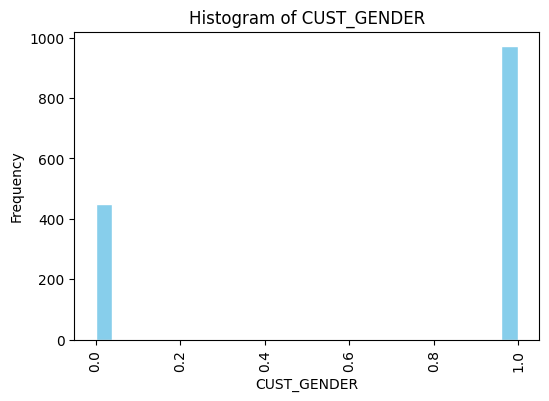


Select variables:
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
11. HOME_THEATER_PACKAGE
12. BOOKKEEPING_APPLICATION
13. PRINTER_SUPPLIES
14. COUNTRY_ORDINAL
15. INCOME_ORDINAL
16. EDUCATION_ORDINAL
17. HOUSEHOLD_SIZE_ORDINAL
0. Exit
Enter the number corresponding to the variable you want to plot (or 0 to exit): 5


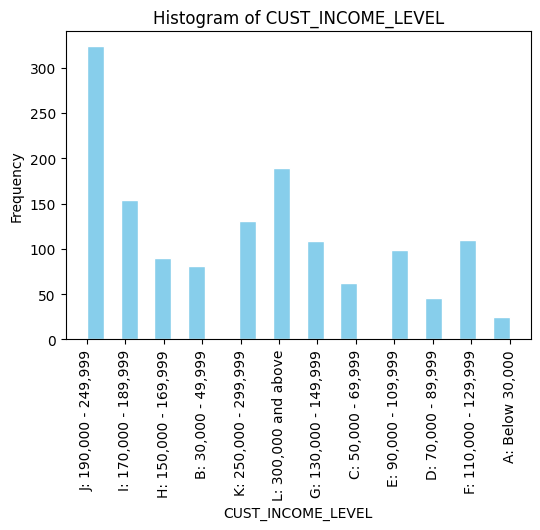


Select variables:
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
11. HOME_THEATER_PACKAGE
12. BOOKKEEPING_APPLICATION
13. PRINTER_SUPPLIES
14. COUNTRY_ORDINAL
15. INCOME_ORDINAL
16. EDUCATION_ORDINAL
17. HOUSEHOLD_SIZE_ORDINAL
0. Exit
Enter the number corresponding to the variable you want to plot (or 0 to exit): 4


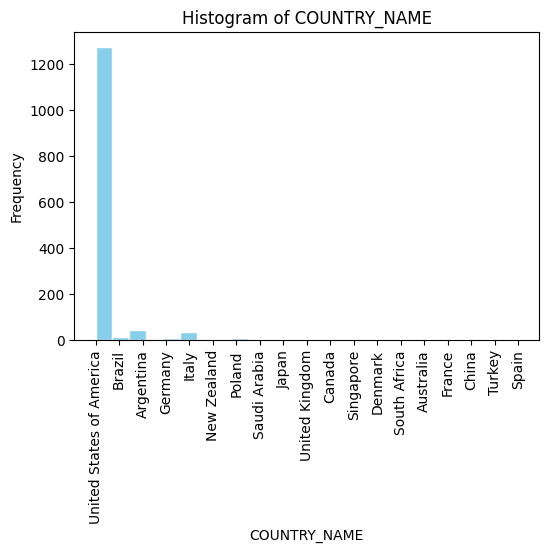


Select variables:
1. CUST_GENDER
2. AGE
3. CUST_MARITAL_STATUS
4. COUNTRY_NAME
5. CUST_INCOME_LEVEL
6. EDUCATION
7. OCCUPATION
8. HOUSEHOLD_SIZE
9. YRS_RESIDENCE
10. AFFINITY_CARD
11. HOME_THEATER_PACKAGE
12. BOOKKEEPING_APPLICATION
13. PRINTER_SUPPLIES
14. COUNTRY_ORDINAL
15. INCOME_ORDINAL
16. EDUCATION_ORDINAL
17. HOUSEHOLD_SIZE_ORDINAL
0. Exit
Enter the number corresponding to the variable you want to plot (or 0 to exit): 0
Program exited. Thank you for using it!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("transformed_data_ML.csv")

# Continuously prompt the user for input until they choose to exit
while True:
    # Step 3: Display available variables for selection
    print("\nSelect variables:")
    for i, col in enumerate(data.columns):
        print(f"{i + 1}. {col}")
    print("0. Exit")

    # Step 4: Prompt the user to choose a variable
    choice = input("Enter the number corresponding to the variable you want to plot (or 0 to exit): ")

    # Step 5: Check if the user wants to exit
    if choice.strip() == '0':
        print("Program exited. Thank you for using it!")
        break

    try:
        # Step 6: Convert user input to integer and check if it's a valid choice
        choice = int(choice)
        if choice < 1 or choice > len(data.columns):
            print("Invalid choice. Please enter a number between 0 and", len(data.columns))
            continue

        # Step 7: Get the selected variable name
        variable_name = data.columns[choice - 1]

        # Step 8: Plot histogram of the selected variable
        plt.figure(figsize=(6, 4))
        plt.hist(data[variable_name], bins=25, color='skyblue', edgecolor='white')
        plt.title(f"Histogram of {variable_name}")
        plt.xlabel(variable_name)
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)  # Rotate x-axis labels to vertical position
        plt.grid(False)
        plt.show()

    except ValueError:
        print("Invalid input. Please enter a number.")

# **5.	Data Mining**

# 5.1: Use 1000 random customer records & build a logistic regression ML model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Data Preparation
# Load the data
data = pd.read_csv('transformed_data_ML.csv')

# Select 1000 random customer records
data_sample = data.sample(n=1000, random_state=42)

# Handle missing values (if any)
data_sample.dropna(inplace=True)

# Encode categorical variables (if any)
data_sample = pd.get_dummies(data_sample, columns=['CUST_MARITAL_STATUS', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE'])

# Split the data into features and target variable
X = data_sample.drop('AFFINITY_CARD', axis=1)
y = data_sample['AFFINITY_CARD']

# Step 2: Data Scaling
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Initialize the logistic regression model with a different solver
model = LogisticRegression(solver='saga', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       150
           1       0.68      0.64      0.66        50

    accuracy                           0.83       200
   macro avg       0.78      0.77      0.78       200
weighted avg       0.83      0.83      0.83       200



In [ ]:
# Step 1: Load data
data = pd.read_csv('Marketing Campaign data.csv')

# Step 2: Drop 'COMMENTS' column
data.drop(columns=['COMMENTS'], inplace=True)

# Step 3: Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("Missing Values:\n", missing_values)
else:
    print("No missing values found.")

# Step 4: Encode categorical variables using one-hot encoding
transformed_data_ML = pd.get_dummies(data)

# Step 5: Save the transformed data to a new file
transformed_data_ML.to_csv('Transformed_Marketing_Data.csv', index=False)

# Step 6: Check the shape of the transformed dataset
print("Shape of Transformed Data:", transformed_data_ML.shape)

No missing values found.
Shape of Transformed Data: (1500, 88)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Select 1000 Random Records
random_customer_records = transformed_data_ML.sample(n=1000, random_state=42)

# Step 3: Split Features and Target
X = random_customer_records.drop('AFFINITY_CARD', axis=1)
y = random_customer_records['AFFINITY_CARD']

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.74


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Select 1000 Random Records
random_customer_records = transformed_data_ML.sample(n=1000, random_state=42)

# Step 3: Split Features and Target
X = random_customer_records.drop('AFFINITY_CARD', axis=1)
y = random_customer_records['AFFINITY_CARD']

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       150
           1       0.38      0.06      0.10        50

    accuracy                           0.74       200
   macro avg       0.57      0.51      0.48       200
weighted avg       0.66      0.74      0.66       200



# 5.2 Implement the prediction application based on the created logistic regression ML model. The application should have an appropriate user interface to allow user input customer records from keyboard and files to receive predicted answers.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Load the trained model
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)

# Function to accept user input for customer records from keyboard
def get_customer_input():
    print("Enter customer details:")
    age = int(input("Age: "))
    gender = input("Gender (M/F): ").upper()
    marital_status = input("Marital Status (Single/Married): ").capitalize()
    # Add other input fields as required
    return {'AGE': age, 'GENDER': gender, 'MARITAL_STATUS': marital_status}  # Add other fields as required

# Function to accept user input for customer records from file
def get_customer_input_from_file():
    file_path = input("Enter the path of the file containing customer records: ")
    try:
        customer_data = pd.read_csv(file_path)
        return customer_data
    except FileNotFoundError:
        print("File not found. Please check the file path and try again.")
        return None

# Preprocess the input data to match the format expected by the model
def preprocess_input(input_data):
    # Perform one-hot encoding for categorical variables
    input_data = pd.get_dummies(input_data, columns=['GENDER', 'MARITAL_STATUS'])  # Add other categorical columns as required

    # Ensure that the input data has the same columns as the features used during training
    # Assuming X is defined elsewhere in your code
    missing_cols = set(X.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0

    # Reorder columns to match the order used during training
    input_data = input_data[X.columns]

    return input_data

# Function to make predictions using the model
def predict(input_data):
    # Preprocess the input data
    preprocessed_data = preprocess_input(input_data)
    # Make predictions
    prediction = model.predict(preprocessed_data)
    return prediction

# Main function to run the prediction application
def main():
    while True:
        print("Select option from below to insert data:")
        print("1. Insert from Keyboard Input")
        print("2. Insert from File")
        print("3. Exit")
        option = input("Enter your choice: ")
        if option == '1':
            customer_input = get_customer_input()
            if customer_input:
                prediction = predict(customer_input)
                if prediction[0] == 1:
                    print("Predicted outcome: The customer is likely to purchase.")
                else:
                    print("Predicted outcome: The customer is unlikely to purchase.")
        elif option == '2':
            customer_input = get_customer_input_from_file()
            if customer_input is not None:
                prediction = predict(customer_input)
                if prediction[0] == 1:
                    print("Predicted outcome: The customer is likely to purchase.")
                else:
                    print("Predicted outcome: The customer is unlikely to purchase.")
        elif option == '3':
            print("Exiting the application...")
            break
        else:
            print("Invalid option. Please select a valid option.")
            continue

# Run the application
main()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Select option from below to insert data:
1. Insert from Keyboard Input
2. Insert from File
3. Exit
Enter your choice: 1
Enter customer details:
Age: 25
Gender (M/F): M
Marital Status (Single/Married): Single
Predicted outcome: The customer is unlikely to purchase.
Select option from below to insert data:
1. Insert from Keyboard Input
2. Insert from File
3. Exit
Enter your choice: exit
Invalid option. Please select a valid option.
Select option from below to insert data:
1. Insert from Keyboard Input
2. Insert from File
3. Exit
Enter your choice: 3
Exiting the application...


# 5.3 Using 100 customer records from remaining dataset to test the accuracy of the application

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Step 1: Load the transformed data
transformed_data_ML = pd.read_csv("transformed_data_ML.csv")

# Step 2: Define the sample size
sample_size = 100

# Step 3: Calculate the number of records remaining
total_records = len(transformed_data_ML)
remaining_records = total_records - sample_size

if remaining_records < 0:
    print("Error: Insufficient remaining records for sampling.")
else:
    # Step 4: Extract 100 customer records from the remaining dataset
    remaining_data = transformed_data_ML.iloc[:remaining_records]
    sample_data = remaining_data.sample(n=sample_size, random_state=42)

    # Step 5: Split the sample data into features and target
    X_test = sample_data.drop(columns=['AFFINITY_CARD'])
    y_test = sample_data['AFFINITY_CARD']

    # Step 6: Impute missing values in features data
    imputer = SimpleImputer(strategy='mean')
    X_test_imputed = imputer.fit_transform(X_test)
    X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

    # Step 7: Reset index of X_test_imputed
    X_test_imputed.reset_index(drop=True, inplace=True)

    # Step 8: Reset index of y_test
    y_test.reset_index(drop=True, inplace=True)

    # Step 9: Align indices of features and target data
    y_test_dropped = y_test.loc[X_test_imputed.index]

    # Step 10: Load the trained model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_test_imputed, y_test_dropped)  # Use synchronized features and target data

    # Step 11: Evaluate the model on the test data
    accuracy = model.score(X_test_imputed, y_test_dropped)
    print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.74
